# Исследование объявлений о продаже квартир

В данном проекте исследовалось влияние различных факторов на стоимость объектов недвижимости в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Данные** - данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир. 

**Цель** - установить параметры, влияющие на стоимость квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Описание данных

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

## Обзор данных

Импортирую библиотеки. 

In [1]:
import pandas as pd

# импорт библиотеки warnings
import warnings
warnings.filterwarnings('ignore')

Считываю данные из файла data.csv и сохраню их в датафрейм data.

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

Выведу первые 20 строчек датафрейма на экран, чтобы ознакомиться с данными, проверить нужные ли данные были загружены.

In [3]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
total_images,20,7,10,0,2,10,6,5,20,18,5,9,10,20,1,16,11,6,8,16
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0,2890000.0,3700000.0,7915000.0,2900000.0,5400000.0,5050000.0,3300000.0,3890000.0,3550000.0,4400000.0,4650000.0,6700000.0,4180000.0,3250000.0,14200000.0
total_area,108.0,40.4,56.0,159.0,100.0,30.4,37.3,71.6,33.16,61.0,39.6,44.0,54.0,42.8,36.0,39.0,82.0,36.0,31.0,121.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00,2017-11-16T00:00:00,2018-08-27T00:00:00,2016-06-30T00:00:00,2017-07-01T00:00:00,2016-06-23T00:00:00,2017-11-18T00:00:00,2017-11-23T00:00:00,2016-09-09T00:00:00,2017-01-27T00:00:00,2019-01-09T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3,1,2,2,2,1,1,3,1,1,3
ceiling_height,2.7,NaN,NaN,NaN,3.03,NaN,NaN,NaN,NaN,2.5,2.67,NaN,NaN,2.56,NaN,NaN,3.05,NaN,2.5,2.75
floors_total,16.0,11.0,5.0,14.0,14.0,12.0,26.0,24.0,27.0,9.0,12.0,5.0,5.0,5.0,6.0,14.0,5.0,17.0,5.0,16.0
living_area,51.0,18.6,34.3,NaN,32.0,14.4,10.6,NaN,15.43,43.6,20.3,31.0,30.0,27.0,17.0,20.5,55.6,16.5,19.4,76.0
floor,8,1,4,9,13,5,6,22,26,7,3,4,5,5,1,5,1,7,2,8
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведe основную информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца и 23699 строки: 
- 2 столбца - тип данных bool
- 14 солбцов - тип данных float64
- 3 солбца - тип данных int64
- 3 солбцов - тип данных object

Сразу видно, что во многих столбцах есть пропуски данных, с ними буду работать дальше.
Также у столбца `'first_day_exposition'` тип данных object , когда в нем записаны дата и время. Тип данных остальных столбцов вполне соответствует действительности. Названия столбцов корректные, изменению не подлежат. 

Согласно документации к данным описание данных:

* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

Построю общую гистограмму для всех числовых столбцов таблицы.

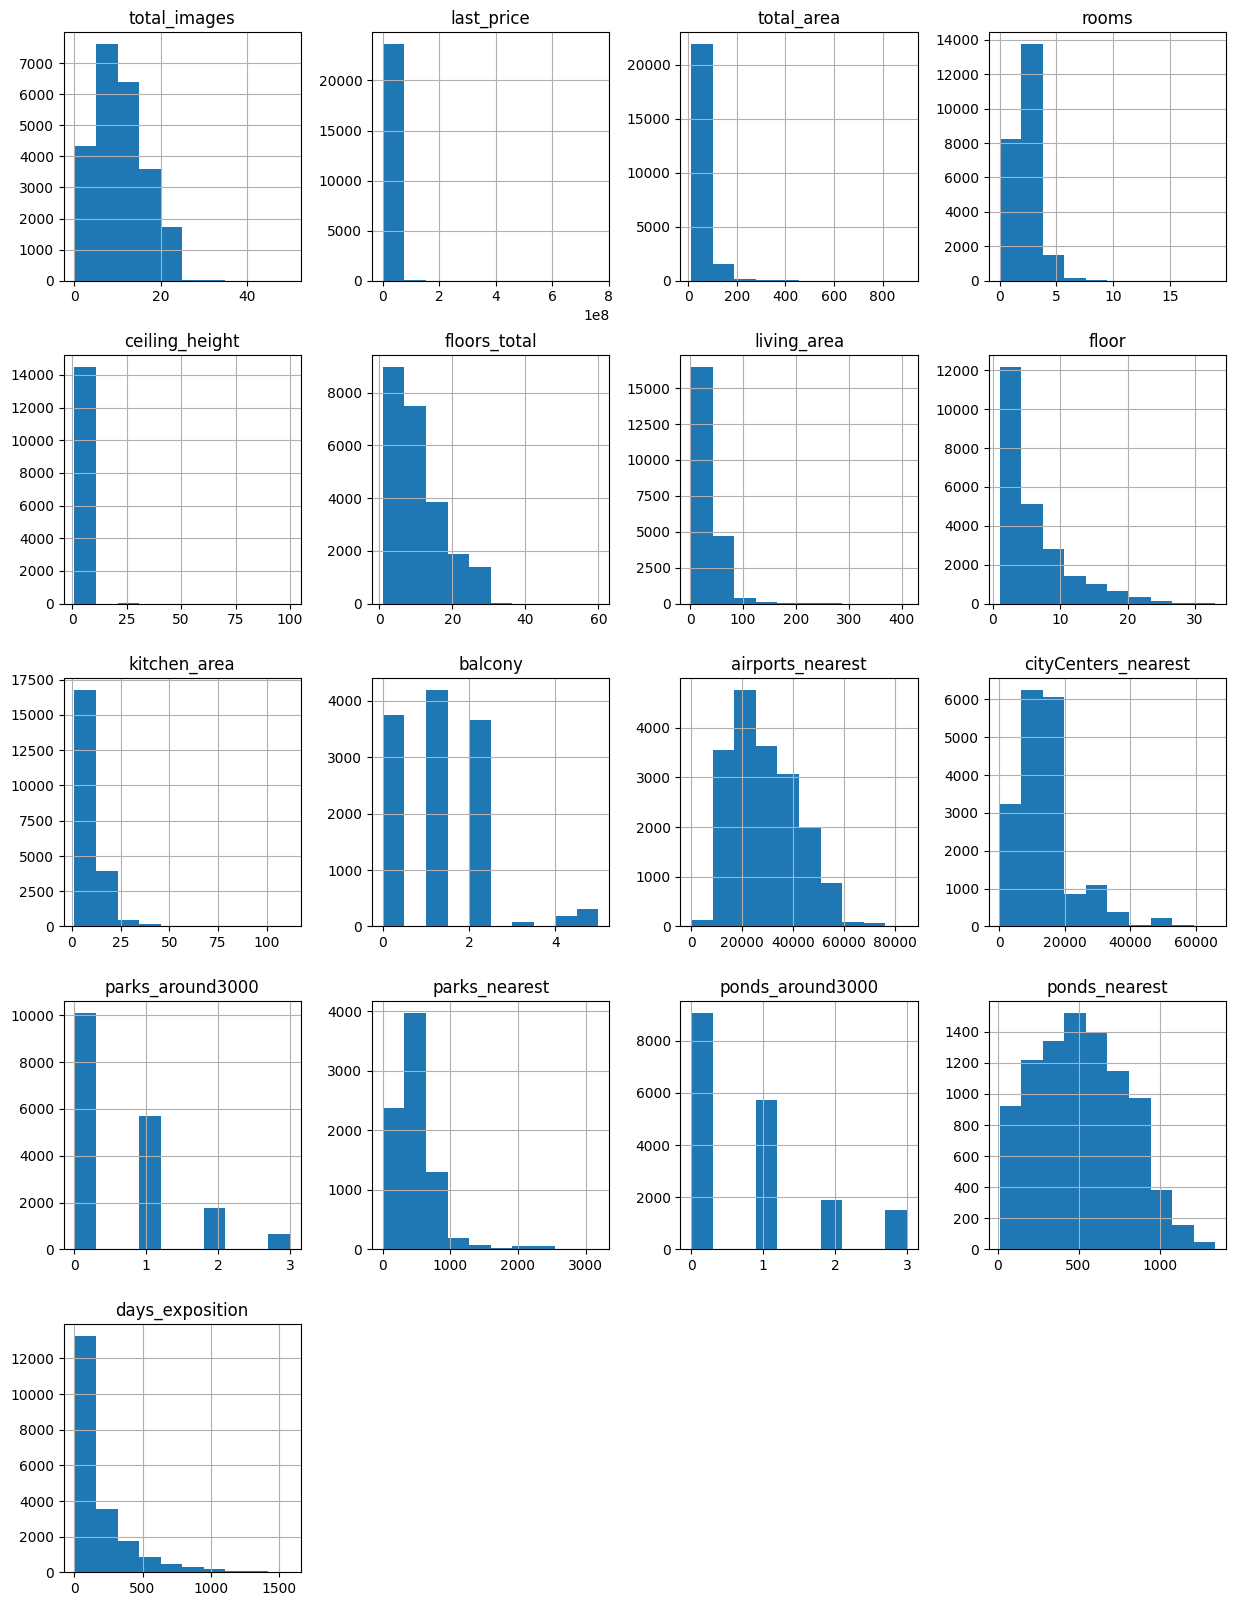

In [5]:
data.hist(figsize=(15, 20));


В некоторых столбцах выделяется большое количество нулевых значений, что вероятно пропуски. 
    
Например, в столбцах `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`,  `'ponds_around3000'` пропуск может быть связан с отсутствием информации. В столбце `'days_exposition'` пропуски могут быть на месте тех объявлений, которые еще не сняты с публикации. Аналогично со столбцом `'balcony'`. Возможно в квартире нет балконов, поэтому ничего и не указано.


### Предобработка данных

#### Удаление пропусков

Выведу долю пропущенных значений для каждого столбца. Так мы увидим, что можно отбросить, а с чем надо работать. 

In [6]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


Всего пропуски есть в 14 столбцах.

Незначительные пропуски (менее 1%) в 2 столбцах:
- `'floors_total'`
- `'locality_name'`

Пропуски в размере до 10% в 2 столбцах:
- `'living_area'`
- `'kitchen_area'`

В столбце `'days_exposition'` 13% пропусков.

Примерно 23% пропусков в столбцах: 
- `'airports_nearest'`
- `'cityCenters_nearest'`
- `'parks_around3000'`
- `'ponds_around3000'`

В столбце `'ceiling_height'` 38% пропусков. В столбце `'balcony'` 49% пропусков.

Более 50% пропусков в столбцах:
- `'ponds_nearest'` - 62%
- `'parks_nearest'` - 66%
- `'is_apartment'` - 88%

Строки с пропусками в столбцах до 10% можно удалить, это не приведет к большой потере данных. Однако я попробую изучить, есть ли зависимость между количеством комнат и площадью кухни или жилой площадью. Если зависимость есть, то пропуски заполню медианным значением по соответствующим группам.

В столбцах `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`,  `'ponds_around3000'` вместо пропусков укажу 0, так как пропуск может быть связан с отсутствием информации.

Аналогично со столбцом `'balcony'`. Возможно в квартире нет балконов, поэтому ничего и не указано.

В столбце `'ceiling_height'` я думаю заменить медианным значением высоты потолков в зависимости от района, этажности дома.

В столбцах, где более 50% пропусков, я изучу их местоположение. Если заполнить пропуске нечем, то заполню их значением 0.

---

Удалю строки с пропусками в столбцах `'floors_total'`, `'locality_name'`.

In [7]:
data = data.dropna(subset=['floors_total', 'locality_name'])

Проверим, как изменилась доля пропусков в датасете.

In [8]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.5
floors_total,0.0
living_area,7.9
floor,0.0
is_apartment,88.3


Теперь посмотрим есть ли зависимость между количеством комнат и общей площадью, жилой площадью или площадью кухни. Для этого построю диаграмму.

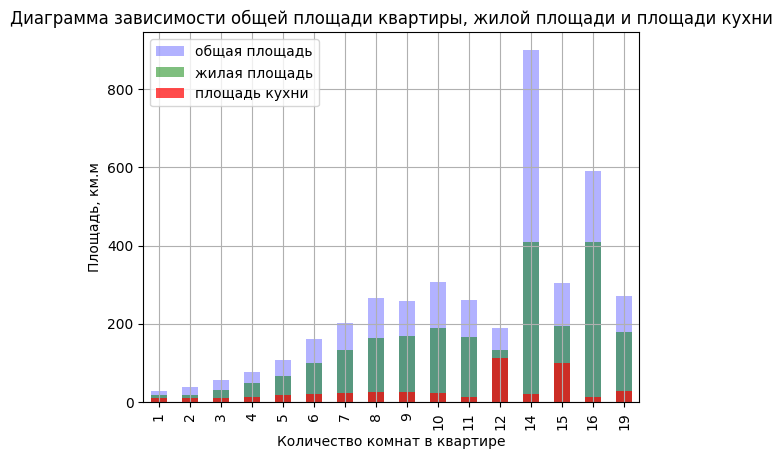

In [9]:
# диаграмма для отображения общей площади в зависимости от количества комнат в квартире 
ax = data.pivot_table(index='rooms', values='total_area', aggfunc='mean').plot(
    kind='bar',
    y='total_area',
    linewidth=5,
    alpha=0.3,
    label='общая площадь',
    grid=True,
    legend=True,
    color='blue')

# диаграмма для отображения жилой площади в зависимости от количества комнат в квартире 
data.pivot_table(index='rooms', values='living_area', aggfunc='mean').plot(
    kind='bar',
    y='living_area', 
    linewidth=5,
    alpha=0.5,
    label='жилая площадь',
    ax=ax,
    color='green')

# диаграмма для отображения площади кухни в зависимости от количества комнат в квартире 
data.pivot_table(index='rooms', values='kitchen_area', aggfunc='mean').plot(
    kind='bar',
    y='kitchen_area',
    linewidth=5,
    alpha=0.7,
    label='площадь кухни',
    ax=ax,
    grid=True,
    legend=True,
    color='red',
    title='Диаграмма зависимости общей площади квартиры, жилой площади и площади кухни',
    xlabel='Количество комнат в квартире',
    ylabel='Площадь, км.м');


В целом видно, что чем больше количество комнат, чем больше общая, жилая площадь и площадь кухни. Также все площади вполне логично между собой соотносятся. На общем фоне выделяются большие по площади в квартиры с 14 и 16 комнатами, а также большие кухни в квартирах с 12 и 15 комнатами, однако это может быть связано с особенностями планировки.

Эта диаграмма была построена, чтобы посмотреть как соотносятся между собой количество комнат и жилая площадь. Видна вполне логичная зависимость, а значит можно заменить пропуски в столбце `'kitchen_area'` на медианное значение в разбивке по количеству комнат.

In [10]:
# Создадим цикл, в котором пройдем по каждому уникальному значению количества комнат (столбец ''rooms')
# Далее в столбце 'kitchen_area' в строки с пропуском запишем медианное значение жилой площади ('kitchen_area')

for t in data['rooms'].unique():
# так как в квартирах где 0 комнат площадь кухни равна 0, учтем это в условии
    if t != 0:
        data.loc[(data['rooms'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
        data.loc[(data['rooms'] == t), 'kitchen_area'].median()
    else:
        data.loc[(data['rooms'] == 0), 'kitchen_area'] = 0    


Пропуски в жилой площади посчитаю разделив общую площадь на коэффициент. Коэффициент будет равен отношению среднего значения общей площади к среднему значению из имеющихся данных по жилой площади.
 

In [11]:
coefficient = data['total_area'].mean() / data['living_area'].mean()

data['living_area'] = data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] / coefficient

Проверим, как изменилась доля пропусков в датасете.

In [12]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.5
floors_total,0.0
living_area,0.0
floor,0.0
is_apartment,88.3



В столбцах `'airports_nearest'`, `'cityCenters_nearest'`, `'parks_around3000'`,  `'ponds_around3000'`, `'ponds_nearest'` и `'parks_nearest'` пропусков более чем 20%. Такие строки удалять нельзя, иначе потеряется значительная часть данных. Хочется заменить пропуски на значение 0, однако тогда это надо держать в голове и учитывать в дальнейшем анализе, что может легко забыться. Поэтому замену на 0 производить не буду, а просто оставлю строки без изменений.

Со столбцом `'balcony'` немного другая картина, . Возможно в квартире нет балконов, поэтому ничего и не указано. Поэтому только для этого столбца я заполню пропуски 0.


In [13]:
data['balcony'] = data['balcony'].fillna(0)

Проверим, как изменилась доля пропусков в датасете.

In [14]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.5
floors_total,0.0
living_area,0.0
floor,0.0
is_apartment,88.3


Далее изучу пропуски в столбце `'ceiling_height'`.

Сначала построю диаграмму размаха, чтобы проверить разброс значений.

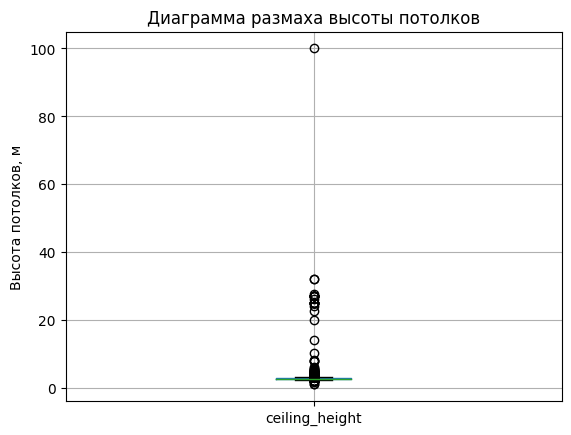

In [15]:
data.plot(y='ceiling_height',
          kind='box',
          title='Диаграмма размаха высоты потолков',
          ylabel='Высота потолков, м',
         grid=True);

Заметны явные выбросы, которые скорее всего связаны с некорректным вводом данных. Выведу уникальные значения для этого столбца.

In [16]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Видно, что есть значения высоты потолка более 20 м, что мало правдоподобно. Скорее всего имелось ввиду высота потолка 2 м. Откорректирую такие значения. Для этого высоту потолков в интервале от 10 до 100 разделю на 10. Высота потолков от 1 м до 1,5 м тоже подозрительно маловероятна, но пока оставлю эти значения без изменений. Вдруг это квартиры с необычной планировкой.

In [17]:
data.loc[data['ceiling_height'].between(10, 100, inclusive='both'), 'ceiling_height'] = \
data['ceiling_height'].between(10, 100, inclusive='both') / 10

Далее заполню пропуски в столбце `'ceiling_height'` медианным значением. А значения с высотой потолка менее 2 метров перезапишу на медианное значение, мне кажется, что все же квартиры с такими низкими потолками маловероятны, скорее всего единица была записана случайно.

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

Проверим, как изменилась доля пропусков в датасете.

In [19]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,0.0
floors_total,0.0
living_area,0.0
floor,0.0
is_apartment,88.3


Заменю высоту потолков менее 2 м на медианное значение.

In [20]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = data['ceiling_height'].median()

Построю диаграмму размаха, чтобы увидеть разброс значений.

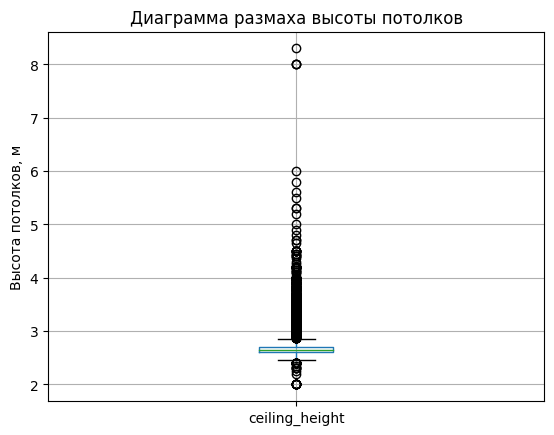

In [21]:
data.plot(y='ceiling_height',
          kind='box',
          title='Диаграмма размаха высоты потолков',
          ylabel='Высота потолков, м',
         grid=True);

На диаграмме видно, что есть квартиры с высокими потолками, высотой более привычных 3,5 м, а также высотой менее 2 м. Не буду исключать из датафрейма такие строки, так как возможно данные квартиры относятся к элитному жилью или нетиповой перепланировки и вправду имеют такие высоки потолки.

---

Далее буду работать над пропусками в столбце `'is_apartment'`. Этот столбец имеет строковый тип данных, но значения True / False, поэтому вероятно пропуски связаны с тем, что данная квартира не является апартаментами. Следовательно можно заменить пропуски на False.

In [22]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверим, как изменилась доля пропусков в датасете.

In [23]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,0.0
floors_total,0.0
living_area,0.0
floor,0.0
is_apartment,0.0



Осталось обработать пропуски в столбце `'days_exposition'`. Выведу строки с пропусками именно в этом столбце и изучу их.


In [24]:
data.query('days_exposition.isna()') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,61.686779,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,40.896050,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,22.846955,3,False,...,9.00,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,28.901399,7,False,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.758159,9,False,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,82.820213,17,False,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.706390,5,False,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,76.428777,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.65,3.0,32.385559,1,False,...,8.70,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Кажется, что пропуски связаны с тем, что эти квартиры еще не проданы. Особенно если посмотреть на год публикации объявления.
Поэтому несмотря на пропуски, я сохраню эти строки в датафрейме.


Проверим, остались ли еще пропуски в датафрейме, которые я не рассматривала и которые можно заполнить/удалить.

In [25]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Вывод:**

В датафрейме остались только те пропуски, которые я решила не заполнять или удалять. Далее необходимо посмотреть есть ли аномальные значения,корректно ли отображается тип данных, а также проверить наличие дубликатов.

#### Изменение типов данных

Выведу еще раз общую информацию по датасету, а также первые 10 строк.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [27]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
total_images,20,7,10,0,2,10,6,5,20,18
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0,2890000.0,3700000.0,7915000.0,2900000.0,5400000.0
total_area,108.0,40.4,56.0,159.0,100.0,30.4,37.3,71.6,33.16,61.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00,2018-09-10T00:00:00,2017-11-02T00:00:00,2019-04-18T00:00:00,2018-05-23T00:00:00,2017-02-26T00:00:00
rooms,3,1,2,3,2,1,1,2,1,3
ceiling_height,2.7,2.65,2.65,2.65,3.03,2.65,2.65,2.65,2.65,2.5
floors_total,16.0,11.0,5.0,14.0,14.0,12.0,26.0,24.0,27.0,9.0
living_area,61.686779,23.075425,31.985737,90.816648,57.117388,17.363686,21.304786,40.89605,18.940126,34.841607
floor,8,1,4,9,13,5,6,22,26,7
is_apartment,False,False,False,False,False,False,False,False,False,False


Столбец `'first_day_exposition'` надо изменить тип данных на datetime, сейчас в этом столбце дата и время записаны как строки. 

Во время изменения типа данных в столбце `'first_day_exposition'` запись самой даты и времени приведу к изначальному виду `2018-12-04T00:00:00`. Также заменю тип данных с float на int в столбцах `'balcony'` и `'floors_total'` так как число этажей или балконов не может быть не целым числом. 

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S') 

In [29]:
data['balcony'] = data['balcony'].astype(int)

In [30]:
data['floors_total'] = data['floors_total'].astype(int)

Проверим, изменился ли тип данных.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Тип данных  отображается корректный.

#### Обработка дубликатов

Сначала проверю наличие явных дубликатов.

In [32]:
data.duplicated().sum()

0

Явных дубликатов нет, осталось проверить неявные. Они могут быть спрятаны только в столбце `'locality_name'`. Сначала приведу все записи к нижнему регистру, затем проверю наличие дубликатов.

In [33]:
data['locality_name'] = data['locality_name'].str.lower()


Выведу уникальные значения и изичу их. Возможно один и тот зе адрес записан по разному. Но сначала создам переменную `'unique_locality_name'`в которую сохраню изначальное количество уникальных значений.


In [34]:
unique_locality_name = len(data['locality_name'].unique())
print('Изначальное количество уникальных значений', unique_locality_name)

Изначальное количество уникальных значений 364


In [35]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '


В датафрейме встречаются одинаковые названия населенных пунктов, но где-то указано "посёлок", а где-то "поселок".В некоторых названиях идет уточнение или упрощение, например, поселок городского типа и городской поселок; поселок при железнодорожной станции и поселок станции; садоводческое некоммерческое товарищество и садовое товарищество. Приведу названия к единому виду и выполню замены. Для этого создам переменную  `'old_name'` с названиями которые буду заменять и переменную `'new_name'` - новые названия.


In [36]:
old_name = ['посёлок', 'ё', 'городской поселок', 'поселок станции', 'садоводческое некоммерческое товарищество']
new_name = ['поселок', 'е', 'поселок городского типа', 'поселок при железнодорожной станции', 'садовое товарищество']
data['locality_name'] = data['locality_name'].replace(old_name, new_name, regex=True)

Выведу еще раз уникальные значения для проверки замены.

In [37]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет


Проверю сколько теперь стало уникальных значений.


In [38]:
print('Было изначально уникальных значений:', unique_locality_name)
print('Стало уникальных значений:', len(data['locality_name'].unique()))

Было изначально уникальных значений: 364
Стало уникальных значений: 328



Неявные дубликаты устранены, что наглядно видно при сравнении уникальных значений.


#### Обработка аномальных значений

Посмотрим описательную статистику и изучим минимальные, максимальные значения по колонкам.

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23565.0,6.540058e+06,1.091093e+07,12190.000000,3.400000e+06,4.646000e+06,6.790000e+06,7.630000e+08
total_area,23565.0,6.032282e+01,3.565706e+01,12.000000,4.000000e+01,5.200000e+01,6.970000e+01,9.000000e+02
rooms,23565.0,2.070656e+00,1.078591e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23565.0,2.697832e+00,2.321067e-01,2.000000,2.600000e+00,2.650000e+00,2.700000e+00,8.300000e+00
floors_total,23565.0,1.067588e+01,6.594823e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,23565.0,3.445482e+01,2.036638e+01,6.854087,2.284696e+01,2.970104e+01,3.981082e+01,5.140565e+02
floor,23565.0,5.878124e+00,4.871485e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,23565.0,1.036830e+01,5.721133e+00,0.000000,7.200000e+00,9.000000e+00,1.150000e+01,1.120000e+02
balcony,23565.0,5.936771e-01,9.606601e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


Минимальная цена на момент снятия с публикации составляет всего 12190, выглягит как сильно заниженная цена, надо проверить столбец `'last_price'`. А максимальная цена почти достигает 1 млрд., что очень много, но возможно это цена большой квартиры.

В столбце `'kitchen_area'` минимальное значение равно 0, это бросается в глазах, но в основном площадь кухни равна 0 в студиях, а в них вероятно не выделяется площадь кухни как отдельная величина.

В остальных столбцах аномальных значений не выявлено.

Посмотрю строку, в которой значение цены на момент снятия с публикации составляет всего 12 190.

In [40]:
data.query('last_price == 12190') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,62.257953,25,False,...,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Всего одна строка с этим значением, причем общая площадь квартиры 109 кв. м, такая большая квартира не может стоить 12 тыс, вероятно при заполнении данных, забыли дописать 000, исправлю это.

In [41]:
data.loc[8793, 'last_price'] = 12190000

Проверим, какое теперь минимальное значение в колонке `'last_price'`.

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23565.0,6.540575e+06,1.091091e+07,430000.000000,3.400000e+06,4.647000e+06,6.790000e+06,7.630000e+08
total_area,23565.0,6.032282e+01,3.565706e+01,12.000000,4.000000e+01,5.200000e+01,6.970000e+01,9.000000e+02
rooms,23565.0,2.070656e+00,1.078591e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23565.0,2.697832e+00,2.321067e-01,2.000000,2.600000e+00,2.650000e+00,2.700000e+00,8.300000e+00
floors_total,23565.0,1.067588e+01,6.594823e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,23565.0,3.445482e+01,2.036638e+01,6.854087,2.284696e+01,2.970104e+01,3.981082e+01,5.140565e+02
floor,23565.0,5.878124e+00,4.871485e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,23565.0,1.036830e+01,5.721133e+00,0.000000,7.200000e+00,9.000000e+00,1.150000e+01,1.120000e+02
balcony,23565.0,5.936771e-01,9.606601e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00



Строка с общей площадь квартиры 900 кв.м явно выброс, поэтому удалю ее.


In [43]:
data = data[data['total_area'] != 900]

In [44]:
# проверим описательную статистику

data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23564.0,9.878501e+00,5.681263e+00,0.000000,6.000000e+00,9.000000e+00,1.400000e+01,5.000000e+01
last_price,23564.0,6.523029e+06,1.057345e+07,430000.000000,3.400000e+06,4.646500e+06,6.790000e+06,7.630000e+08
total_area,23564.0,6.028719e+01,3.523573e+01,12.000000,4.000000e+01,5.200000e+01,6.970000e+01,6.312000e+02
rooms,23564.0,2.070234e+00,1.076672e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.900000e+01
ceiling_height,23564.0,2.697827e+00,2.321107e-01,2.000000,2.600000e+00,2.650000e+00,2.700000e+00,8.300000e+00
floors_total,23564.0,1.067527e+01,6.594303e+00,1.000000,5.000000e+00,9.000000e+00,1.600000e+01,6.000000e+01
living_area,23564.0,3.443447e+01,2.012573e+01,6.854087,2.284696e+01,2.970104e+01,3.981082e+01,3.605250e+02
floor,23564.0,5.877313e+00,4.869996e+00,1.000000,2.000000e+00,4.000000e+00,8.000000e+00,3.300000e+01
kitchen_area,23564.0,1.036399e+01,5.682814e+00,0.000000,7.200000e+00,9.000000e+00,1.150000e+01,1.070000e+02
balcony,23564.0,5.937023e-01,9.606727e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00


квартира с общей площадью 900 кв.м. имеет 12 комнат, в целом данные выглядят правдоподобно. Просто большая и просторная квартира. Эта строка не является выбросом.

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавлю новый столбец с ценой одного квадратного метра

Для этого я разделю строки столбца с последней ценой на общую площадь.

In [45]:
data['price_square_meter'] = data['last_price'] / data['total_area']

#### Добавлю новый столбец - день недели публикации объявления  (0 — понедельник, 1 — вторник и так далее)

In [46]:
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday

#### Добавлю новый столбец  - месяц публикации объявления

In [47]:
data['month_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

#### Добавлю новый столбец  - год публикации объявления

In [48]:
data['year_day_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

#### Добавлю новый столбец  - тип этажа квартиры (значения — «первый», «последний», «другой»)

Для этого пройдусь в цикле по уникальным значениям в столбце `'floor'` и присвою в новый столбец под названием `'type_floor'` значения соответствующие условию «первый», «последний». Значение «другой» присвою пустым строкам.

In [49]:
# Пройдусь в цикле по уникальным значениям в столбце 'floor' и присвою в новый столбец значения соответствующие условию

for apartment_floor in data['floor'].unique():
    data.loc[(data['floor'] == 1), 'type_floor'] = 'первый'
    data.loc[data['floor']== data['floors_total'], 'type_floor'] = 'последний'
data.loc[data['type_floor'].isna(), 'type_floor'] = 'другой'

#### Добавлю новый столбец  - расстояние до центра города в километрах (переведу из м в км и округлю до целых значений).

In [50]:
data['cityCenters_nearest_kilometer'] = round(data['cityCenters_nearest'] / 1000)

Проверим значения в новых столбцах.

In [51]:
data.head(5).T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,2.65,2.65,2.65,3.03
floors_total,16,11,5,14,14
living_area,61.686779,23.075425,31.985737,90.816648,57.117388
floor,8,1,4,9,13
is_apartment,False,False,False,False,False


Новые столбцы корректно отображают информацию.

**Вывод**

Во время предобработки данных:

1. В столбцах `'floors_total'`, `'locality_name'` были удалены строки с пропусками. Таких строк было меньше 1%, поэтому их удаление допустимо;

2. В столбце `'living_area'` пропуски в жилой площади посчитаю разделив общую площадь на коэффициент. Коэффициент будет равен отношению среднего значения общей площади к среднему значению из имеющихся данных по жилой площади.

3. В столбце `'kitchen_area'` пропуски были заменены на медианное значение в разбивке по количеству комнат;

4. В столбце `'balcony'` пропуски были заменены на 0. Предположительно, пропуски связаны с отсутствием информации; 

5. В столбце `'ceiling_height'` пропуски были заменены на медианное значение. Аномальные значения высоты потолка больше 10 м были откорректированны. Строки со значениями менее 2 м, также были приняты аномально низкими и заменены медианным значением;

6. В столбце `'is_apartment'` было принято пропуски заменить значением False, так как вероятно пропуски связаны с тем, что данная квартира не является апартаментами;

7. В столбце `'first_day_exposition'` изменен тип данных на datetime;

8. В столбцах `'balcony'` и `'floors_total'` изменен тип данных на int;

9. В столбце `'locality_name'` устранены неявные дубликаты;

10. В столбце `'last_price'` откорректировано аномально низкое значение;

11. В столбце `'total_area'` откорректировано аномально высокое значение;

12. Созданы следующие столбцы:
- `'price_square_meter'` - цена одного квадратного метра;
- `'week_day_exposition'` - день недели публикации объявления; 
- `'month_day_exposition'` - месяц публикации объявления;
- `'year_day_exposition'` - год публикации объявления;
- `'type_floor'` - тип этажа квартиры;
- `'cityCenters_nearest_kilometer'` - расстояние до центра города в километрах.

### Исследовательский анализ данных

#### Изучу следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Построю для каждого столбца отдельную гистограмму.

##### Общая площадь

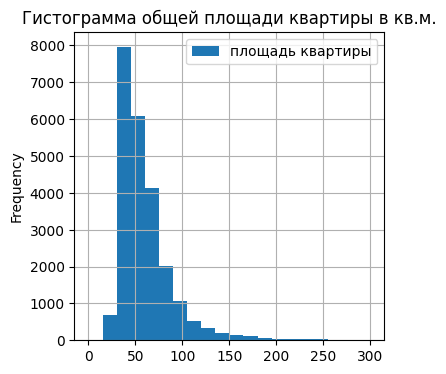

In [52]:
data.plot(y='total_area', kind='hist', range=(0, 300), figsize=(4,4), bins=20,
          title='Гистограмма общей площади квартиры в кв.м.',
          label='площадь квартиры',
          grid=True);

Распределение объявлений по общей площади квартир неравномерное. Больше всего объявлений с небольшими квартирами общей площадью от 25 кв.м до 55 кв.м. Чем больше площадь квартиры тем быстрее уменьшается количество объявлений. 

##### Жилая площадь

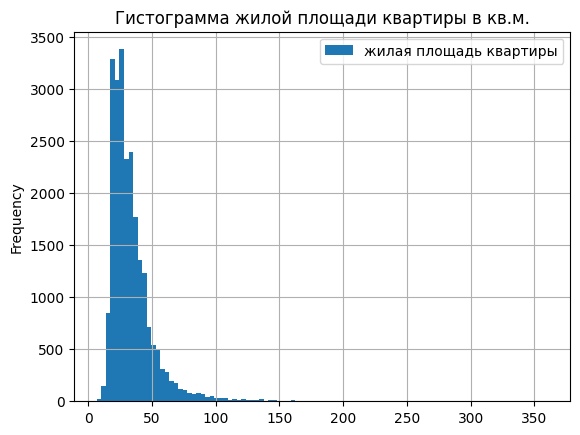

In [53]:
data.plot(y='living_area', kind='hist',  bins=100,
          title='Гистограмма жилой площади квартиры в кв.м.',
          label='жилая площадь квартиры',
          grid=True);


В основном продаются квартиры с жилой площадью до 50 кв.м, таких объявлений более 3 тыс. Объявления с квартирами жилой площаадью более 100 кв.м единичны.


##### Площадь кухни

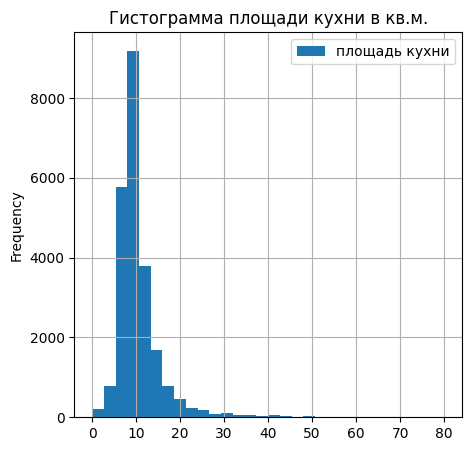

In [54]:
data.plot(y='kitchen_area', kind='hist', range=(0, 80), figsize=(5,5), bins=30,
          title='Гистограмма площади кухни в кв.м.',
          label='площадь кухни',
          grid=True);

Распределение объявлений по площади кухни неравномерное. Больше всего объявлений с кухнями площадью около 10 кв.м (их около 8 тыс. объявлений), такие кухни достаточно просторные. Дальше встречается больше объявлений с площадью кухни от 6 до 8 кв.м (почти 5 тыс. объявлений), объявлений большими кухнями площадью от 15 кв.м около 1 тыс., с кухнями большей площадью менее 500 объявлений.

##### Цена объекта


Чтобы было удобнее анализировать цену объекта, я создам еще один столбец `'price_category'`, в который сохраню значения цены в млн, то есть разделю цену на 1000000.


In [55]:
data['price_category'] = data['last_price'] / 1000000

In [56]:
# проверка столбца на корректность данных
data.head(5).T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000.0,3350000.0,5196000.0,64900000.0,10000000.0
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07 00:00:00,2018-12-04 00:00:00,2015-08-20 00:00:00,2015-07-24 00:00:00,2018-06-19 00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,2.65,2.65,2.65,3.03
floors_total,16,11,5,14,14
living_area,61.686779,23.075425,31.985737,90.816648,57.117388
floor,8,1,4,9,13
is_apartment,False,False,False,False,False


Далее построю гистограмму уже для нового столбца и посмотрю как распределены цены в объявлениях.

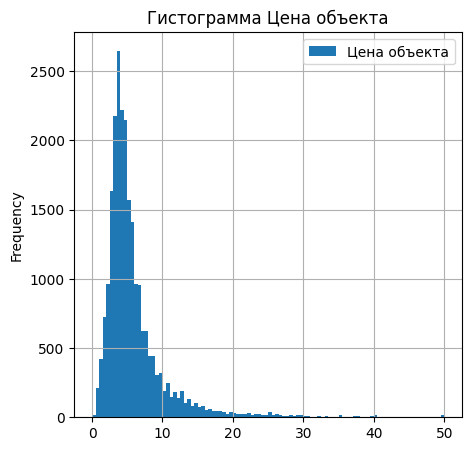

In [57]:
data.plot(y='price_category', kind='hist', bins=100,range=(0, 50), figsize=(5,5), 
          title='Гистограмма Цена объекта',
          label='Цена объекта',
          grid=True);


На гистограмме видно большое количество объявлений с ценами в диапазоне до 10 млн большой хвост с более дорогими квартирами. Построю еще одну гистограмму, чтобы посмотреть подробнее распределение цен с наибольшим количеством объявлений.


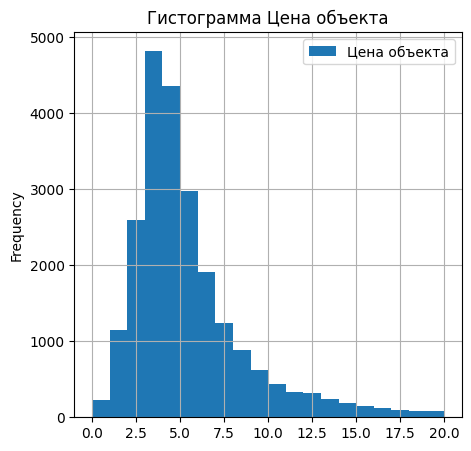

In [58]:
data.plot(y='price_category', kind='hist', bins=20, range=(0, 20), figsize=(5,5), 
          title='Гистограмма Цена объекта',
          label='Цена объекта',
          grid=True);


Больше всего объявлений о продаже квартиры с ценой в диапазоне 3 - 5 млн (более 4 тыс. объявлений), около 3 тыс. объявлений с ценами 5 - 8 млн и более 2 тыс объявлений с ценой квартиры 1 - 3 млн. На гистограмме видно, что мало объявлений с ценами от 10 млн и более (менее 500). 

Таким образом чаще продают квартиры с ценой 3 - 5 млн.
   


##### Количество комнат

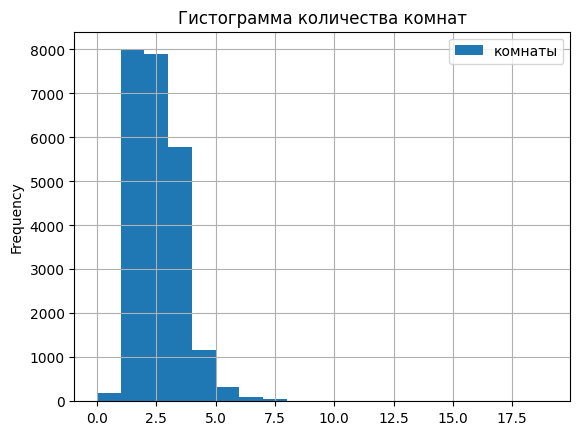

In [59]:
data.plot(y='rooms', kind='hist', bins=19,
          title='Гистограмма количества комнат',
          label='комнаты',
          grid=True);

На данной гистограмме видно, что больше всего объявлений квартир с 1-3 комнатами (от 7 тыс. до 11 тыс. объявлений). Около 1 тыс. объявлений квартир с 5 комнатами, а с большим количеством комнат объявления единичны и практически не видны на гистограмме. Однако после изучения описательной статистики выше известно, что максимальное количество комнат 19.

##### Высота потолков

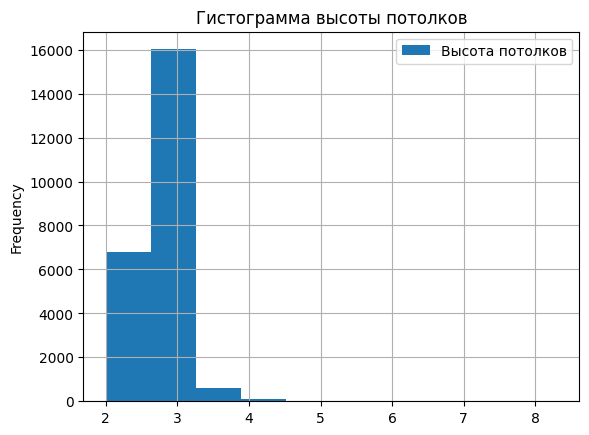

In [60]:
data.plot(y='ceiling_height', kind='hist', 
          title='Гистограмма высоты потолков',
          label='Высота потолков',
          grid=True);

В основной массе объявлений высота потолков около 3м. Однако, когда я работала над аномальными значениями в этом столбце, я помню, что были объявления с высотой потолков более 5 м, таких объявлений мало, поэтому их не видно на данной гистограмме. Построю для таких значений еще одну гистограмму.

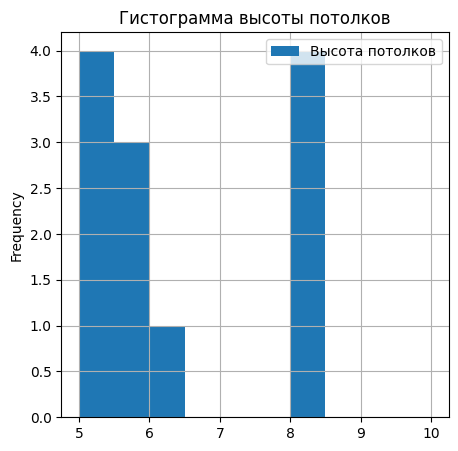

In [61]:
data.plot(y='ceiling_height', kind='hist', range=(5, 10), figsize=(5,5), 
          title='Гистограмма высоты потолков',
          label='Высота потолков',
          grid=True);

В целом теория подтверждается, что объявлений с очень высокими потолками мало.

##### Этаж квартиры

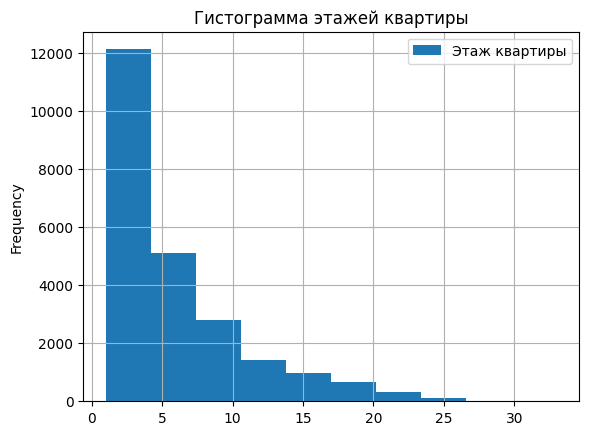

In [62]:
data.plot(y='floor', kind='hist', 
          title='Гистограмма этажей квартиры',
          label='Этаж квартиры',
          grid=True);

В основном продаются квартиры на низких этажах до 5-го, таких объявлений более 10 тыс. Далее чем выше этаж, тем меньше объявлений. В многоэтажках (более 20 этажей) объявлений о продаже менее 500.

##### Тип этажа квартиры

In [63]:
data.groupby('type_floor')['type_floor'].count().sort_values(ascending=False)

type_floor
другой       17326
последний     3354
первый        2884
Name: type_floor, dtype: int64


Построю гистограмму для визуализации.


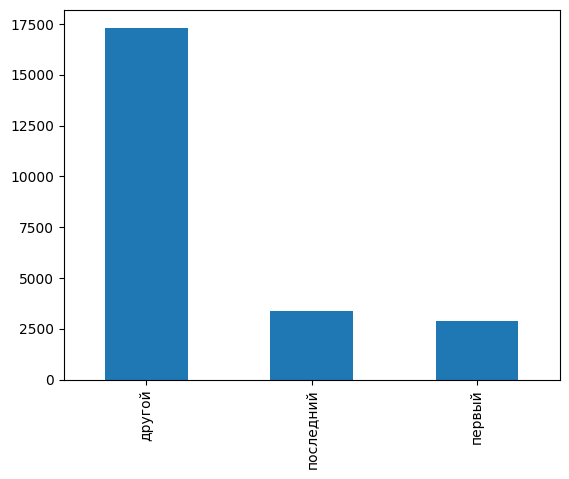

In [64]:
data['type_floor'].value_counts().plot(kind='bar');

Больше всего объявлений квартир на всех этажах, кроме первого и последнего.

##### Общее количество этажей в доме

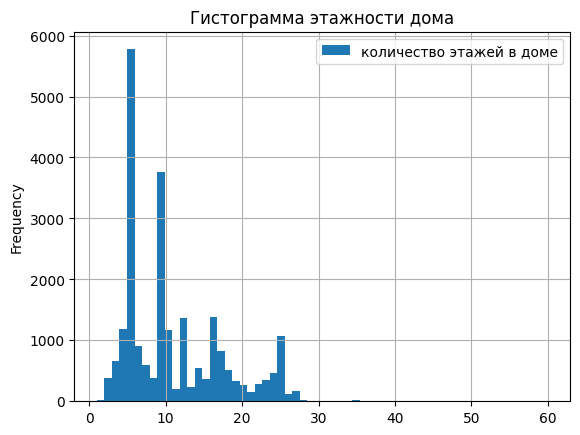

In [65]:
data.plot(y='floors_total', kind='hist', bins=60,
          title='Гистограмма этажности дома',
          label='количество этажей в доме',
          grid=True);


В основном на продажу выставляют квартиры в малоэтажных домах, более 5 тыс. объявлений в 5-ти этажных домах, немного менее в 10-ти этажных домах. Чем многоэтажнее дом, тем меньше объявлений. Возможно в Санкт-Петербурге и соседних населённых пунктах в целом больше низкоэтажных домов.
    


##### Расстояние до центра города в метрах

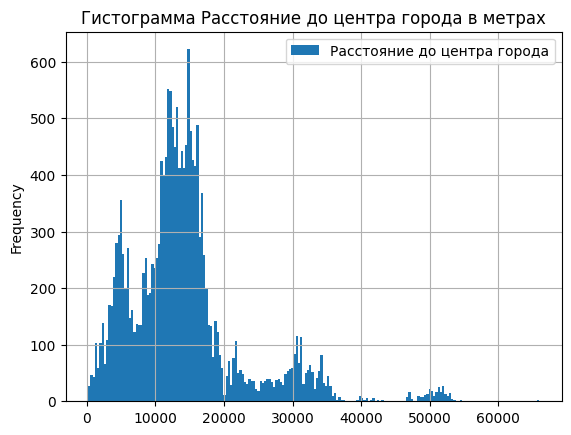

In [66]:
data.plot(y='cityCenters_nearest', kind='hist', bins=200,
          title='Гистограмма Расстояние до центра города в метрах',
          label='Расстояние до центра города',
          grid=True);


Большая часть объявлений о продаже квартир на расстоянии 10-20 км от центра города. Немного меньше объявлений -  квартиры в черте города с расстоянием до центра до 5 км. Совсем мало объявлений из соседних населённых пунктах, расположенных в более чем 30 км от центра города.


##### Расстояние до ближайшего аэропорта

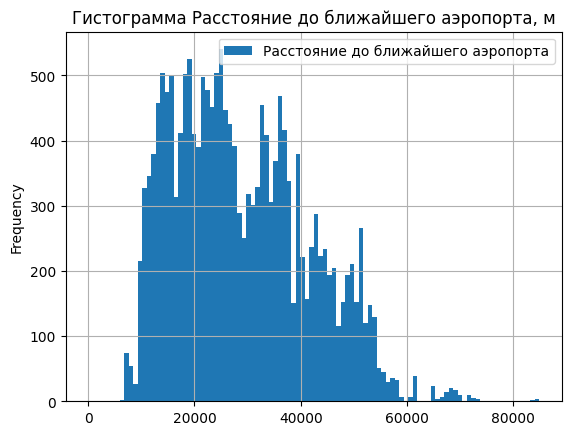

In [67]:
data.plot(y='airports_nearest', kind='hist', bins=100,
          title='Гистограмма Расстояние до ближайшего аэропорта, м',
          label='Расстояние до ближайшего аэропорта',
          grid=True);


Объявлений с квартирами расположенными рядом с аэропортом совсем нет, также совсем мало квартир на расстоянии более 50 км от аэропорта. Большая часть квартир имеет расстояние до ближайшего аэропорта от 20 до 30 км.
    


##### Расстояние до ближайшего парка

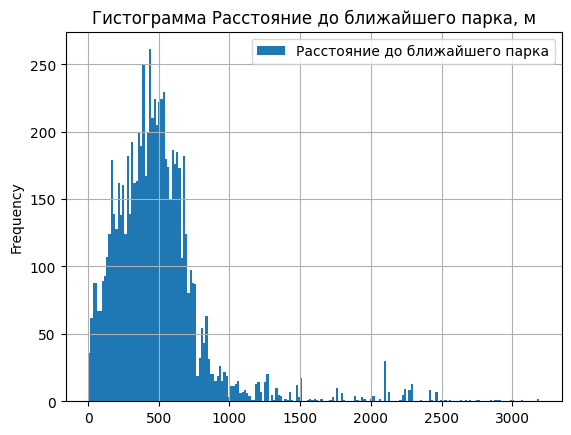

In [68]:
data.plot(y='parks_nearest', kind='hist', bins=200,
          title='Гистограмма Расстояние до ближайшего парка, м',
          label='Расстояние до ближайшего парка',
          grid=True);


Во многих объявлениях указано наличие парка на расстоянии 300 - 500 м (более 200 объявлений) и лишь в нескольких объявлениях парк расположен в нескольких км.
    


##### День и месяц публикации объявления

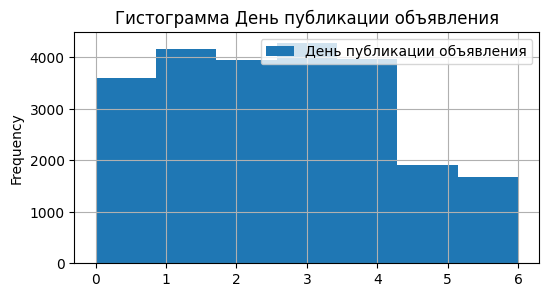

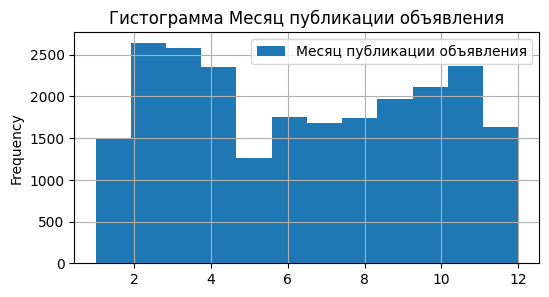

In [69]:
data.plot(y='week_day_exposition', kind='hist', bins=7, figsize=(6, 3),
          title='Гистограмма День публикации объявления',
          label='День публикации объявления',
          grid=True)
data.plot(y='month_day_exposition', kind='hist', figsize=(6, 3), bins=12,
          title='Гистограмма Месяц публикации объявления',
          label='Месяц публикации объявления',
          grid=True);

В основном, объявление о продаже квартиры публикуют со вторника по четверг (более 3,5 тыс. объявлений). Меньше всего объявлений публикуют в выходные.

Также продажа квартир имеет сезонность. В основном объявления публикуют под конец зимы (февраль) и середину - конец осени. Летом и на конец весны наблюдается спад публикаций объявлений.

### Изучу, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.


Для начала построю гистограмму для столбца `'days_exposition'`.

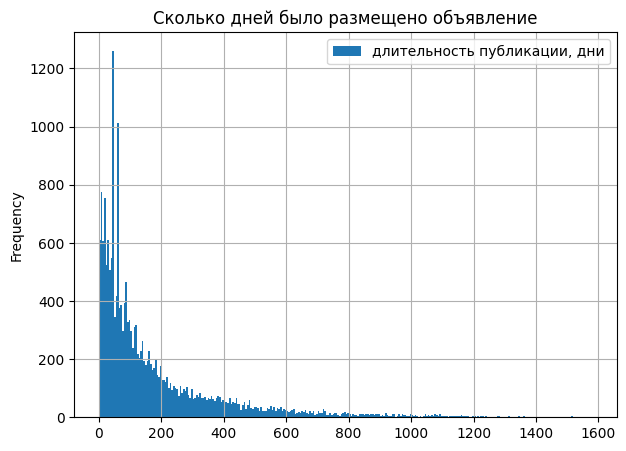

In [70]:
data.plot(y='days_exposition', kind='hist', bins=300, figsize=(7, 5),
          title='Сколько дней было размещено объявление',
          label='длительность публикации, дни',
          grid=True);

В основном большая часть объявлений были опубликованы до 6 месяцев (180 дней). Меньше 1 тыс. объявлений были опубликованы более 2 лет, вероятно у таких объявлений было невыгодное предложение для покупки.

Далее посчитаю среднее и медиану длительности публикации объявления.

In [71]:
print(f'Средняя длительность публикации {round(data["days_exposition"].mean() / 30)} месяцев')
print(f'Медианная длительность публикации {round(data["days_exposition"].median() / 30)} месяца')

Средняя длительность публикации 6 месяцев
Медианная длительность публикации 3 месяца


Значение медианы меньше среднего в 2 раза, что говорит о неравномерности данных, которые имеют положительную скошенность. Это заметно и на гистограмме, видно отчетливый пик на начальных значениях, а потом резкое убывание. 

Медиана устойчивее среднего к неравномерным данным, поэтому буду считать, что обычно продажа квартиры занимает 3 месяца.

**Вывод:**

Обычно продажа квартиры занимает 3 месяца, иногда затягивается до 6 месяцев. Продажу квартиры до 3 месяцев можно считать быстрой, а необычно долгая продажа будет длиться более 1 года.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта? 

Для выявления зависимости между ценой и общей площадью квартиры построю диаграмму рассеивания.

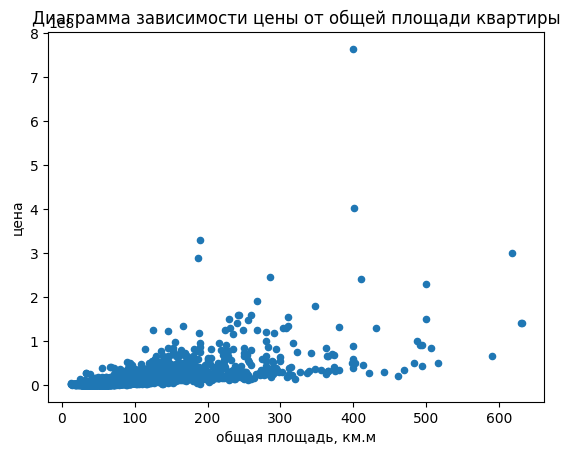

In [72]:
data.plot(x='total_area', y='last_price', kind='scatter',
        title='Диаграмма зависимости цены от общей площади квартиры',
        xlabel='общая площадь, км.м',
        ylabel='цена');

На диаграмме прослеживается неявная зависимость между ценой и общей площадью квартиры. Чем больше площадь, тем выше цена. Для подтверждения зависимости рассчитаю коэффициент корреляции.

In [73]:
print('Коэффициент корреляции между ценой и общей площадью квартиры:', \
      round(data['total_area'].corr(data['last_price']), 1))

Коэффициент корреляции между ценой и общей площадью квартиры: 0.6


Коэффициент корреляции близится к единице, зависимоть положительная.

Далее изучу зависимость цены от жилой площади.

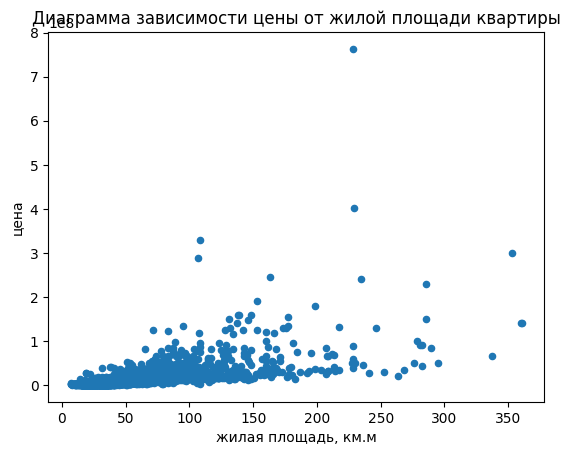

In [74]:
data.plot(x='living_area', y='last_price', kind='scatter',
        title='Диаграмма зависимости цены от жилой площади квартиры',
        xlabel='жилая площадь, км.м',
        ylabel='цена');

На диаграмме прослеживается зависимость между ценой и общей площадью квартиры. Чем больше жилая площадь, тем выше цена. Но присутствуют и выбросы. Проверим это и посчитаем коэффициент корреляции.

In [75]:
print('Коэффициент корреляции между ценой и жилой площадью квартиры:', \
      round(data['living_area'].corr(data['last_price']), 1))

Коэффициент корреляции между ценой и жилой площадью квартиры: 0.6


Коэффициент корреляции близится к единице, зависимоть положительная.

Далее изучу зависимость цены от площади кухни.

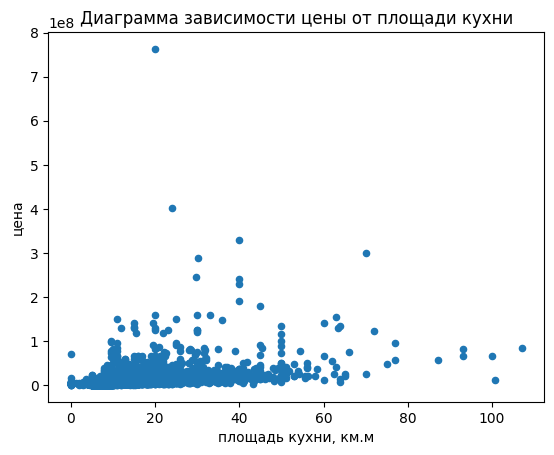

In [76]:
data.plot(x='kitchen_area', y='last_price', kind='scatter',
        title='Диаграмма зависимости цены от площади кухни',
        xlabel='площадь кухни, км.м',
        ylabel='цена');

На диаграмме прослеживается зависимость между ценой и площадью кухни. Чем больше площадь кухни, тем выше цена. Но присутствуют и выбросы, завышена цена в квартирах со средней кухней или кухня большая, а цена низкая.

Проверю зависимость и посчитаю коэффициент корреляции.

In [77]:
print('Коэффициент корреляции между ценой и площадью кухни:', \
      round(data['kitchen_area'].corr(data['last_price']), 1))

Коэффициент корреляции между ценой и площадью кухни: 0.4


Зависимость цены от площади кухни есть, но не такая выраженая как от жилой площади или общей площади квартиры.

Далее изучу зависимость цены от количества комнат.

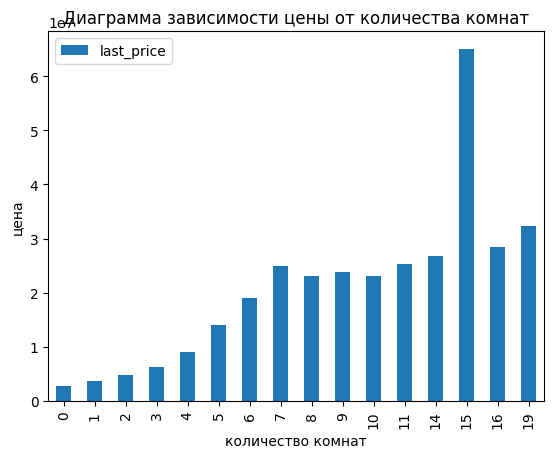

In [78]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median')\
    .plot(kind='bar',
        title='Диаграмма зависимости цены от количества комнат',
        xlabel='количество комнат',
        ylabel='цена',
        );

In [79]:
print('Коэффициент корреляции между ценой и количеством комнат:', \
      round(data['rooms'].corr(data['last_price']), 1))

Коэффициент корреляции между ценой и количеством комнат: 0.4


В целом на гистограмме прослеживается, что чем больше комнат, тем выше цена. Также видена завышенная цена у квартир с 12 комнатами, что вероятно выброс. Подтверждает небольшую зависимость между этими параметрами и коэффициент корреляции равный 0,4.

Далее изучу зависимость цены от типа этажа: первый, последний, другой.

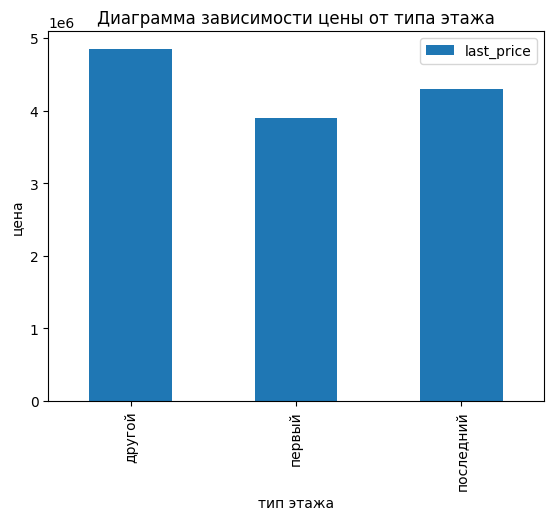

In [80]:
data.pivot_table(index='type_floor', values='last_price', aggfunc='median')\
    .plot(kind='bar',
        title='Диаграмма зависимости цены от типа этажа',
        xlabel='тип этажа',
        ylabel='цена');

Самые дешевые квартиры - квартиры на первом этаже, немного дороже - квартиры на последнем этаже.

Далее изучу зависимость цены от даты размещения (день недели, месяц, год). Для этого построю сразу 3 столбчатых диаграммы.

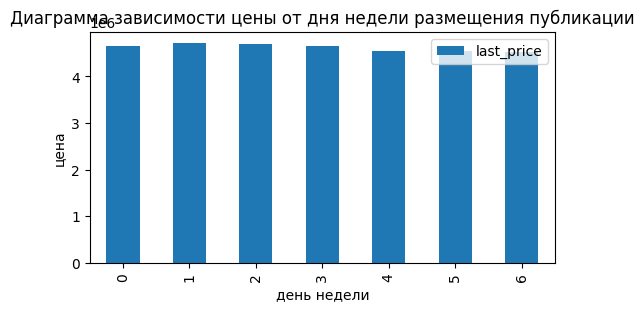

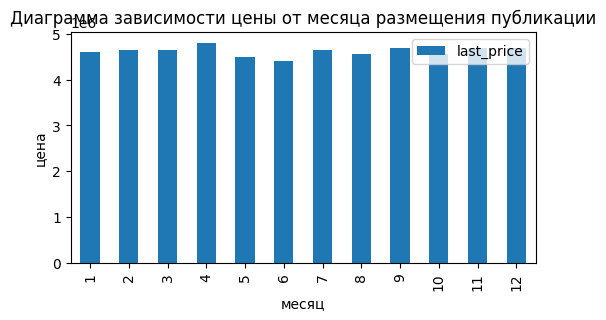

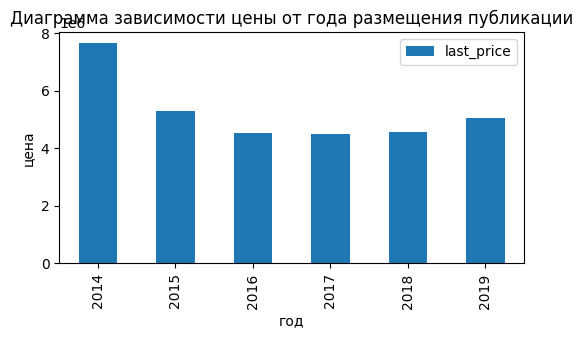

In [81]:
data.pivot_table(index='week_day_exposition', values='last_price', aggfunc='median')\
    .plot(kind='bar', figsize=(6, 3),
        title='Диаграмма зависимости цены от дня недели размещения публикации',
        xlabel='день недели',
        ylabel='цена')

data.pivot_table(index='month_day_exposition', values='last_price', aggfunc='median')\
    .plot(kind='bar', figsize=(6, 3),
        title='Диаграмма зависимости цены от месяца размещения публикации',
        xlabel='месяц',
        ylabel='цена')

data.pivot_table(index='year_day_exposition', values='last_price', aggfunc='median')\
    .plot(kind='bar', figsize=(6, 3),
        title='Диаграмма зависимости цены от года размещения публикации',
        xlabel='год',
        ylabel='цена');

В целом не прослеживается никакой зависимости цены от дня недели публикации или месяца. Однако если проследить изменение цены по годам, то можно увидеть, что с 2014 по 2017 наблюдается тренд на снижении стоимости жилья.

**Вывод:**

Основными факторами, влияющими на стоимость квартиры являются:
- общая площадь квартиры. Чем больше площадь, тем выше цена;
- тип этажа, на котором расположена квартира. На первых и последних этажах квартиры дешевле;

В меньшей степени стоимость квартиры зависит от:
- жилой площади и площади кухни. Чем больше площадь, тем выше цена;
- количество комнат. Чем больше комнат, тем выше цена.

Дата размещения объявления на цену не влияет. Замечено, что с 2014 по 2017 наблюдается тренд на снижении стоимости жилья


### Рассчитаю среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Сгруппирую объявления по населенным пунктам, чтобы выделить, где больше всего опубликовано объявлений, и посчитаю для них среднюю цену одного квадратного метра.

In [82]:
data_group = data.groupby('locality_name')\
            .aggregate({'locality_name' : 'count', 'price_square_meter' : 'mean'}).round()
data_group.columns = ['количество объявлений', 'ср. цена 1кв.м']  
data_group.sort_values(by='количество объявлений', ascending=False).head(10)

,количество объявлений,ср. цена 1кв.м
locality_name,,
санкт-петербург,15650,114854.0
поселок мурино,552,85630.0
поселок шушары,439,78551.0
всеволожск,398,68654.0
пушкин,369,103126.0
колпино,338,75425.0
поселок парголово,327,90176.0
гатчина,307,68746.0
деревня кудрово,299,92474.0


Больше всего объявлений в Санкт-Петербурге, стоимость 1 кв.м составляет около 115 тыс., на втором месте по количеству объявлений - посёлок Мурино, где средняя цена 1 кв.м составляет около 86 тыс.

Среди 10 населённых пунктов с наибольшим числом объявлений средняя минимальная цена за кв.м в Выборге и состовляет 59 тыс. Самая высокая цена за кв.м в Санкт-Петербурге и состовляет почти 115 тыс.



### Теперь вычислю среднюю цену каждого километра. 

Выявить зависимость стоимости квартиры от расстояния до центра города будет проще, если построить диаграмму, что я и сделаю.

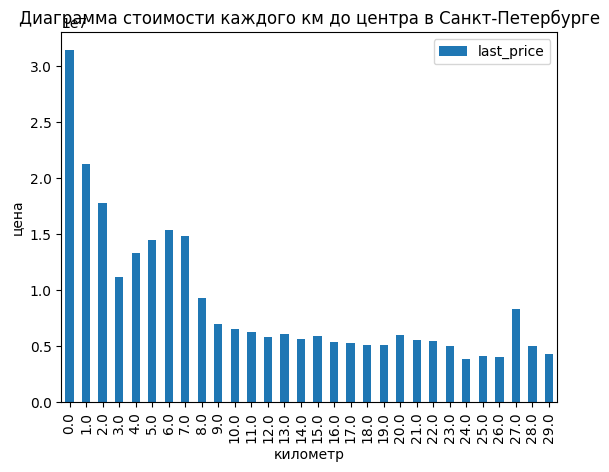

In [83]:
data.query('locality_name == "санкт-петербург"')\
    .pivot_table(index='cityCenters_nearest_kilometer', values='last_price', aggfunc='mean').round()\
    .plot(y='last_price', kind='bar',
         title='Диаграмма стоимости каждого км до центра в Санкт-Петербурге',
        xlabel='километр',
        ylabel='цена');

Чем ближе к центру расположена квартира, тем она дороже. Выделяется низкая стоимость квартир в 3 км от центра, либо это некорректные данные, либо на таком расстоянии мало объявлений или неудачное расположение квартир. Также заметен пик увеличения стоимость на расстоянии 27 км, что может были либо выбросом, либо необычным объектом. 

### Общий вывод

В данном проекте исследовалось влияние различных факторов на стоимость объектов недвижимости в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Данные** - данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир. 

**Цель** - установить параметры, влияющие на стоимость квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

**Во время предобработки данных:**

1. В столбцах `'floors_total'`, `'locality_name'` были удалены строки с пропусками. Таких строк было меньше 1%, поэтому их удаление допустимо;

2. В столбце `'living_area'` пропуски в жилой площади посчитаю разделив общую площадь на коэффициент. Коэффициент будет равен отношению среднего значения общей площади к среднему значению из имеющихся данных по жилой площади.

3. В столбце `'kitchen_area'` пропуски были заменены на медианное значение в разбивке по количеству комнат;

4. В столбце `'balcony'` пропуски были заменены на 0. Предположительно, пропуски связаны с отсутствием информации; 

5. В столбце `'ceiling_height'` пропуски были заменены на медианное значение. Аномальные значения высоты потолка больше 10 м были откорректированны. Строки со значениями менее 2 м, также были приняты аномально низкими и заменены медианным значением;

6. В столбце `'is_apartment'` было принято пропуски заменить значением False, так как вероятно пропуски связаны с тем, что данная квартира не является апартаментами;

7. В столбце `'first_day_exposition'` изменен тип данных на datetime;

8. В столбцах `'balcony'` и `'floors_total'` изменен тип данных на int;

9. В столбце `'locality_name'` устранены неявные дубликаты;

10. В столбце `'last_price'` откорректировано аномально низкое значение;

11. В столбце `'total_area'` откорректировано аномально высокое значение;

12. Созданы следующие столбцы:
- `'price_square_meter'` - цена одного квадратного метра;
- `'week_day_exposition'` - день недели публикации объявления; 
- `'month_day_exposition'` - месяц публикации объявления;
- `'year_day_exposition'` - год публикации объявления;
- `'type_floor'` - тип этажа квартиры;
- `'cityCenters_nearest_kilometer'` - расстояние до центра города в километрах.

**Во время исследовательского анализы были сформулированы следующие выводы:**

**1. Изучены следующие параметры объектов:**
- общая площадь. Распределение объявлений по общей площади квартир неравномерное. Больше всего объявлений с небольшими квартирами общей площадью от 25 кв.м до 55 кв.м;

- жилая площадь. В основном продаются квартиры с жилой площадью до 50 кв.м, таких объявлений более 3 тыс. Объявления с квартирами жилой площаадью более 100 кв.м единичны.;

- площадь кухни. Распределение объявлений по площади кухни неравномерное. Больше всего объявлений с кухнями площадью около 10 кв.м (их около 8 тыс. объявлений), такие кухни достаточно просторные. Дальше встречается больше объявлений с площадью кухни от 6 до 8 кв.м (почти 5 тыс. объявлений), объявлений большими кухнями площадью от 15 кв.м около 1 тыс., с кухнями большей площадью менее 500 объявлений.;

- цена объекта. Чаще продают квартиры с ценой 3 - 5 млн.;

- количество комнат. Больше всего объявлений квартир с 1-3 комнатами (от 7 тыс. до 11 тыс. объявлений). Около 1 тыс. объявлений квартир с 5 комнатами, а с большим количеством комнат объявления единичны;

- высота потолков. В основной массе объявлений высота потолков около 3м;

- этаж квартиры. В основном продаются квартиры на низких этажах до 5-го, таких объявлений более 10 тыс. Далее чем выше этаж, тем меньше объявлений.;

- тип этажа квартиры («первый», «последний», «другой»). Больше всего объявлений квартир на всех этажах, кроме первого и последнего.;

- общее количество этажей в доме. В основном на продажу выставляют квартиры в малоэтажных домах, более 5 тыс. объявлений в 5-ти этажных домах, немного менее в 10-ти этажных домах. Чем многоэтажнее дом, тем меньше объявлений.;

- расстояние до центра города в метрах. Большая часть объявлений о продаже квартир на расстоянии 10-20 км от центра города. Немного меньше объявлений - квартиры в черте города с расстоянием до центра до 5 км. Совсем мало объявлений из соседних населённых пунктах, расположенных в более чем 30 км от центра города.;

- расстояние до ближайшего аэропорта. Объявлений с квартирами расположеннвми рядом с аэропортом совсем нет, также совсем мало квартир на расстоянии более 50 км от аэропорта. Большая часть квартир имеет расстояние до ближайшего аэропорта от 20 до 30 км.;

- расстояние до ближайшего парка. Во многих объявлениях указано наличие парка на расстоянии 300 - 500 м (более 200 объявлений) и лишь в нескольких объявлениях парк расположен в нескольких км.;

- день и месяц публикации объявления. В основном, объявление о продаже квартиры публикуют со вторника по четверг (более 3,5 тыс. объявлений). Меньше всего объявлений публикуют в выходные. Также продажа квартир имеет сезонность. В основном объявления публикуют под конец зимы (февраль) и середину - конец осени. Летом и на конец весны наблюдается спад публикаций объявлений.

**2. Изучено как быстро продавались квартиры:**
- Обычно продажа квартиры занимает 3 месяца, иногда затягивается до 6 месяцев. Продажу квартиры до 3 месяцев можно считать быстрой, а необычно долгая продажа будет длиться более 1 года.

**3. Изучено какие факторы больше всего влияют на общую стоимость объекта:**

**3.1. Основными факторами, влияющими на стоимость квартиры являются:**
- общая площадь квартиры. Чем больше площадь, тем выше цена;
- тип этажа, на котором расположена квартира. На первых и последних этажах квартиры дешевле;

**3.2.В меньшей степени стоимость квартиры зависит от:**
- жилой площади и площади кухни. Чем больше площадь, тем выше цена;
- количество комнат. Чем больше комнат, тем выше цена.

**3.3.Дата размещения объявления на цену не влияет. Замечено, что с 2014 по 2017 наблюдается тренд на снижении стоимости жилья**

**4. Рассчитана средняя цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, а также определены населенные пункты с минимальной и максимальной средней ценой одного квадратного метра:**
- Больше всего объявлений в Санкт-Петербурге, стоимость 1 кв.м составляет около 113 тыс., на втором месте по количеству объявлений - посёлок Мурино, где средняя цена 1 кв.м составляет около 86 тыс.
- Среди 10 населённых пунктов с наибольшим числом объявлений минимальная цена за кв.м в Гатчине и состовляет 10,5 тыс. Среди 10 населённых пунктов с наибольшим числом объявлений самая высокая цена за кв.м в Санкт-Петербурге и состовляет почти 2 млн.

**5. Расчитана зависимость стоимости квартиры от расстояния до центра города:**
- Чем ближе к центру расположена квартира, тем она дороже. 
- Выделяется низкая стоимость квартир в 3 км от центра, либо это некорректные данные, либо на таком расстоянии мало объявлений или неудачное расположение квартир. 
- Заметен пик увеличения стоимость на расстоянии 27 км, что может были либо выбросом, либо необычным объектом. 
